# understanding pset object

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta
from operator import attrgetter

In [2]:
fieldset = FieldSet.from_parcels("/nexsan/people/pmiron/test/MovingEddies_data/moving_eddies")

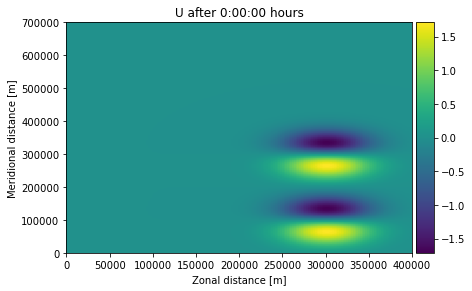

In [3]:
fieldset.U.show()

In [16]:
pset = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=[3.3e5,  3.3e5], # a vector of release longitudes 
                             lat=[1e5, 2.8e5])    # a vector of release latitudes


pset_dynamic = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                                     pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                                     lon=[3.3e5,  3.3e5], # a vector of release longitudes 
                                     lat=[1.5e5, 3.2e5])    # a vector of release latitudes

In [17]:
pset.add(pset_dynamic)

P[8](lon=330000.000000, lat=100000.000000, depth=0.000000, time=not_yet_set)
P[9](lon=330000.000000, lat=280000.000000, depth=0.000000, time=not_yet_set)
P[10](lon=330000.000000, lat=150000.000000, depth=0.000000, time=not_yet_set)
P[11](lon=330000.000000, lat=320000.000000, depth=0.000000, time=not_yet_set)

In [18]:
pset.size

4

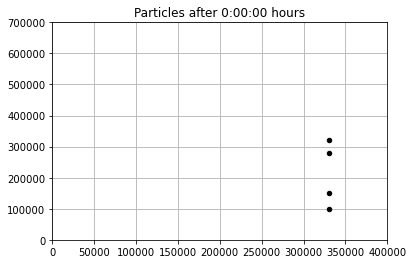

In [19]:
pset.show()

In [20]:
output_file = pset.ParticleFile(name="EddyParticles.nc", outputdt=timedelta(hours=1)) # the file name and the time step of the outputs
pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=6),    # the total length of the run
             dt=timedelta(minutes=5),      # the timestep of the kernel
             output_file=output_file)

output_file.close()

INFO: Compiled ArrayJITParticleAdvectionRK4 ==> /tmp/parcels-1043/libaa36eee92d15ac421f619a3476b97de0_0.so


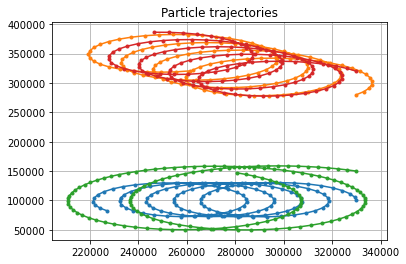

In [21]:
plotTrajectoriesFile('EddyParticles.nc');